# Projeto-Lello Imóveis


# Análise do preço de aparmentos São paulo pelo site lello Imóveis 


Alunos:

<li>Gabriel de Araújo Alves 
<li>André Lima
<li>Enzo Rodrigues



# 1. Introdução

## 1.1 Como verificar o preço?

<ul>Sabemos que o setor imobiliário é um setor muito procurado ao longo dos anos e atualmente.Por isso, primeiro é necessário, a partir do site do quinto andar, e,considerando apartamentos da cidade de São Paulo, podemos traçar uma estimativa de preços médios de apartamentos ou casas considerando alguns fatores como:<ul/>
        <li> Área da casa ou apartamento
        <li> Número de quartos 
        <li> Bairro
        <li> rua  

## 1.2 Importando Bibliotecas necessárias

In [3]:

%matplotlib inline
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd
from random import randint
# Remove warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML  # Para ter melhor print.
from math import *
# para nos comunicarmos com a Web
import requests

# para extrair informações de páginas HTML
import bs4
from bs4 import BeautifulSoup


# Modelos preditivos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Módulos complementares para os modelos preditivos
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

## 1.3 Extração de Dados

## 1.3.1 Definindo cabeçalho User-Agent

In [2]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

## 1.3.2 Definindo Url de Busca

In [3]:
url = 'https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'

## 1.3.3 Utilizando *requests* para baixar a página do Lello Imóveis

Com o uso da biblioteca **requests**, podemos obter o **HTML** das páginas da LelloImóveis.

In [4]:
url = 'https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'#considerando só a primeira página
resposta = requests.get(url = url, headers=headers)
resposta.json

resposta.encoding = 'utf-8'

# resposta.text

## 1.3.4 Extraindo informações relevantes com *BeautifulSoup*

Perceba que o HTML inclui uma grande quantidade de tags, o que dificulta identificar informações relevantes de forma direta. Com o auxílio da biblioteca **BeautifulSoup** podemos extrair facilmente as informações que desejamos.

In [5]:
soup = BeautifulSoup(resposta.text, 'html.parser')

## 1.3.5 Utilizando *requests* para baixar a página do LelloImóveis

Com o uso da biblioteca **requests**, podemos obter o **HTML** da página do Quinto Andar.

In [6]:
# url ='https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'
resposta = requests.get(url = url, headers=headers)
resposta.encoding = 'utf-8'
soup = BeautifulSoup(resposta.content, 'html.parser')

# 1.3.6-Considerando apenas a 1° página como exemplo

In [7]:
url = 'https://www.lelloimoveis.com.br/venda/residencial/1-pagina/'
resposta = requests.get(url = url, headers=headers)

ap = "card-body"  # Há no total 24 objetos com essa classe, mas os 12 primeiros são idênticos aos 12 últimos


lista_total = []
lista_aps = soup.find_all(class_=ap, limit=12)
lista_total.append(lista_aps)
print(len(lista_total)) #lista_total tem uma lista com os 12 elementos

1


# 1.3.7-Pegando todas as páginas de apartamentos

In [9]:
lista_total = []
for i in range(1,955):
    url = 'https://www.lelloimoveis.com.br/venda/residencial/{}-pagina/'.format(i)
    resposta = requests.get(url = url, headers=headers)
    soup = BeautifulSoup(resposta.content, 'html.parser')
    lista_aps = soup.find_all(class_=ap, limit=12)
    lista_total.append(lista_aps)

In [10]:
#list_comprehension para todos os elementos(apartamentos da lista de páginas)
flat_list = [item for sublist in lista_total for item in sublist]  # todos os elementos encontrados individualmente


# 1.3.8-Função para criação de dataFrame com informações relevantes e limpeza de dados

In [11]:
def data(lista):
    #listas necessárias
    lista_tipo=[]
    lista_rua=[]
    lista_bairro=[]
    lista_area=[]
    lista_quartos=[]
    lista_vagas=[]
    lista_banheiros=[]
    lista_aluguel_total=[]
    


    for i in range(0, len(lista)):
        ap = lista[i] #procura cada lista de apartamentos
        #tipo do ap
        tipo=ap.find('div',attrs={'class': "card-title h5"}).text
        lista_tipo.append(tipo)
        #rua
        rua=ap.find('p',attrs={'class': "text-truncate mb-0"}).text
        lista_rua.append(rua)
        #bairro
        bairro=ap.find('span',attrs={'class': "card-text-neighborhood mt-1 text-truncate"}).text.split(',')[0]
        lista_bairro.append(bairro)
        #area do ap
        area=ap.find('span',attrs={'class': "tagItemstyle__TagValue-sc-13sggff-3 edPntf"})
        if area==None:
            area=0
        else:
            area=int(ap.find('span',attrs={'class': "tagItemstyle__TagValue-sc-13sggff-3 edPntf"}).text.split("m²")[0])
        lista_area.append(area)
        
        #numero de quartos
        quartos=ap.find('span',attrs={'class': "tagItemstyle__ComplementValue-sc-13sggff-4 hERajv ml-0"})
        if quartos==None:
            quartos=0            
        else:
            quartos=int(ap.find('span',attrs={'class': "tagItemstyle__ComplementValue-sc-13sggff-4 hERajv ml-0"}).text.split(" ")[0])
        lista_quartos.append(quartos)
        #numero de vagas de carro
        vagas_carro=ap.find('span',attrs={'data-testid': "realty-parking-lot-quantity"})
        if vagas_carro==None:
            vagas_carro=0
        else:
            vagas_carro=int(ap.find('span',attrs={'data-testid': "realty-parking-lot-quantity"}).text.split("Garagens")[0])
        lista_vagas.append(vagas_carro)
        
        #numero de banheiros
        banheiros=ap.find('span',attrs={'data-testid':"realty-bathroom-quantity"})
        if banheiros==None:
            banheiros=0
        else:                
            banheiros=int(ap.find('span',attrs={'data-testid':"realty-bathroom-quantity"}).text.split("Banheiros")[0])
        lista_banheiros.append(banheiros)
        #valor do aluguel
        aluguel=ap.find('p',attrs={'class':"mb-0 font-weight-bold"})
        if aluguel==None:
            aluguel=0
        else:
            aluguel=int(ap.find('p',attrs={'class':"mb-0 font-weight-bold"}).text.split("R$")[1].replace(",",""))
        lista_aluguel_total.append(aluguel)
    
    df = pd.DataFrame({'Tipo': lista_tipo,
                   'Rua': lista_rua,
                   'Bairro': lista_bairro,
                   'Área': lista_area,
                   'Quartos':lista_quartos,
                    'Vagas':lista_vagas,
                    'Banheiros':lista_banheiros,
                   'Preço de Venda':lista_aluguel_total
                  })
        
    return df


# 1.3.9 Criando Dataframe com dados limpos

In [12]:
flat_list = [item for sublist in lista_total for item in sublist]  # todos os elementos encontrados individualmente
frame=data(flat_list)
frame

,Tipo,Rua,Bairro,Área,Quartos,Vagas,Banheiros,Preço de Venda
0,Apartamento,Rua dos Capitães Mores,Mooca,87,3,2,2,620000
1,Apartamento,Rua Dias Leme,Mooca,79,2,1,1,560000
2,Apartamento,Rua do Orfanato,Vila Prudente,59,2,1,1,460000
3,Apartamento,Rua Álvares de Azevedo,Centro,133,3,1,2,550000
4,Apartamento,Rua Dianópolis,Parque da Mooca,43,2,1,1,320000
...,...,...,...,...,...,...,...,...
11371,Casa,Rua Rubiácea,Água Fria,90,3,1,2,590000
11372,Apartamento,Av. Profa. Virgília Rodrigues A. C. Pinto,Jd. Leonor M. de Barros,100,3,2,1,1042000
11373,Apartamento,Rua Braga,Vila Lusitânia,91,2,2,2,735000
11374,Apartamento,Rua Arroio Grande,Sacomã,67,3,2,1,555000


### 1.4 -Rodando a base de dados trazida do excel(refazer essa parte)

In [13]:

# import pandas as pd
# new_frame=pd.read_excel("Database-LelloImoveis.xlsx")
# new_frame=new_frame.drop(['Unnamed: 0'], axis=1)
# # new_frame=new_frame.drop(columns=new_frame['Unnamed:0'],axis=1)
# new_frame

# 2 Análise de Dados

### 2.1 Verificação de Dados nulos na base

<AxesSubplot:>

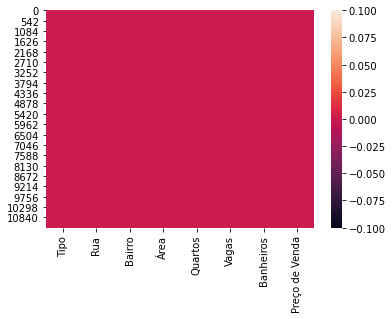

In [14]:
#utilização do heatmap para verificar dados nulos
sns.heatmap(frame.isnull())

### 2.2-Identificando Outliers

Importando a base de dados com base nos dados que foram retirados anteriormente, criamos um excel para não ficar rodando todo o programa para realizar as análises

In [4]:
df = pd.read_excel("Base Lello - Eletiva Web.xlsx")

In [5]:
df

,Unnamed: 0,Tipo,Rua,Bairro,Área,Quartos,Vagas,Banheiros,Preço de Venda
0,0,Apartamento,Rua dos Capitães Mores,Mooca,87,3,2,2,620000
1,1,Apartamento,Rua Dias Leme,Mooca,79,2,1,1,560000
2,2,Apartamento,Rua do Orfanato,Vila Prudente,59,2,1,1,460000
3,3,Apartamento,Rua Álvares de Azevedo,Centro,133,3,1,2,550000
4,4,Apartamento,Rua Dianópolis,Parque da Mooca,43,2,1,1,320000
...,...,...,...,...,...,...,...,...,...
11371,11371,Casa,Rua Rubiácea,Água Fria,90,3,1,2,590000
11372,11372,Apartamento,Av. Profa. Virgília Rodrigues A. C. Pinto,Jd. Leonor M. de Barros,100,3,2,1,1042000
11373,11373,Apartamento,Rua Braga,Vila Lusitânia,91,2,2,2,735000
11374,11374,Apartamento,Rua Arroio Grande,Sacomã,67,3,2,1,555000


Nessa parte plotamos um gráfico para verificar o comportamento dos dados obtidos. Dessa forma, podemos verificar se há a presença de outliers dentro da base

In [6]:
import matplotlib.pyplot as plt

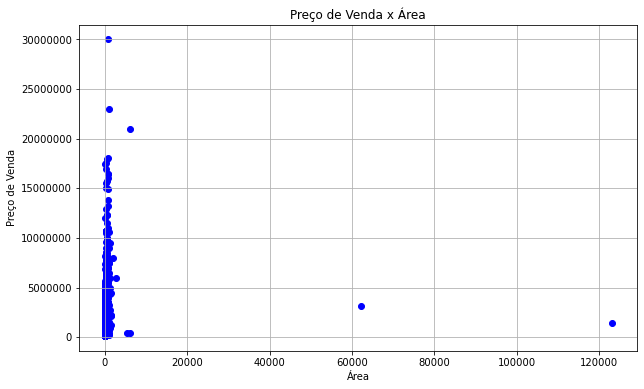

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Área"],df["Preço de Venda"], color="b")
plt.grid()
plt.ylabel("Preço de Venda")
plt.xlabel("Área")
plt.title("Preço de Venda x Área")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Como podemos observar a partir do gráfico qual mostra a relação entre o Preço de Venda e Área em m2, 
é possível constatar a presença de outliers. Dessa forma, com intuito de não viesar as estimações que serão feitas na próxima etapa optamos por retirá-los.

No código abaixo podemos verificar que os outliers foram retirados arbitrariamente, achando os valores máximos e os retirando. Optamos por retirar somente aqueles que são muito discrepantes em relação a amostra


Nos dois códigos abaixo:

1) Retira os valores discrepantes relacionados a área

2) Retira os valores discrepantes relacionados ao Preço de Venda

In [8]:
i=np.zeros(10)

for i in range(len(i)):
    a=df["Área"].max()
    b=df[df["Área"] == a]
    df.drop(b["Unnamed: 0"], axis=0, inplace=True)
    i



In [9]:
i=np.zeros(10)

for i in range(len(i)):
    a=df["Preço de Venda"].max()
    b=df[df["Preço de Venda"] == a]
    df.drop(b["Unnamed: 0"], axis=0, inplace=True)
    i

## 2-3 Gráficos de Dispersão

Transformando tanto a Área e Preço de Venda em uma lista para traçar uma linha de tendência que pode ser vista no gráfico abaixo 

In [10]:
area=df["Área"]
preço=df["Preço de Venda"]

Após realizar essas modificações na base, plotamos um mesmo gráfico anterior adicionando uma linha de tendência

Analisando a disposição dos dados abaixo podemos verificar uma correlação positiva entre tamanho do apartamento e
preço de venda. Algo certamente óbvio, mas outro objetivo é entender se essa relação é linear ou apresenta outro tipo
de formação.

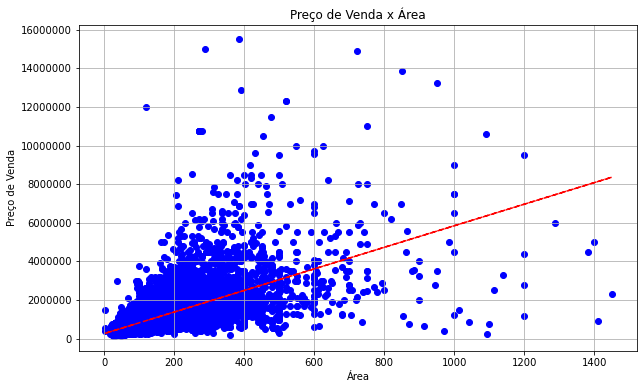

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(area,preço, color="b")
plt.grid()
plt.ylabel("Preço de Venda")
plt.xlabel("Área")
plt.title("Preço de Venda x Área")
plt.ticklabel_format(style='plain', axis='y')

z = np.polyfit(area, preço, 1)
p = np.poly1d(z)
plt.plot(area, p(area), "r--")

Tabela de correlação; quanto mais perto do 1, maior é a correlação positiva (e mais vermelho na tabela). Podendo verificar evidências que o aumento da área, de banheiros, quartos ou vagas implica e um aumento do valor do imóvel

<AxesSubplot:>

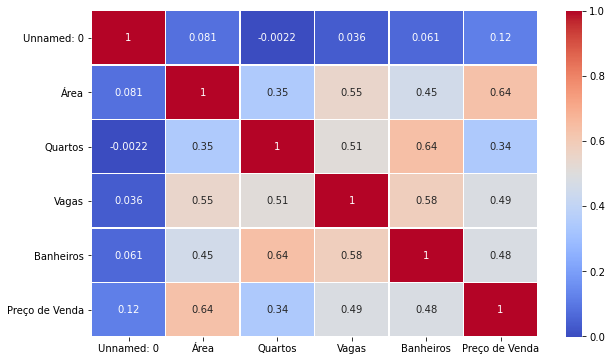

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=.5)



Nessa parte foi realizado um boxplot, o qual separa em quartil a distribuição dos dados, o importante não é necessariamente observar os dados que estão com valores elevados e sim as medianas e os valores mais abaixo, tanto para o número de quartos, vagas e banheiros, constatando um crescimento do valor dos imóveis a medida que há mais desses espaços. 


Obs: Os pontos foras do boxplots representam o que código entende como outlier e os ultimos são linhas pois possuem poucos valores 

## 2.4-Boxplots 

### 2.4.1-Boxplot Quartos x Preço de Venda

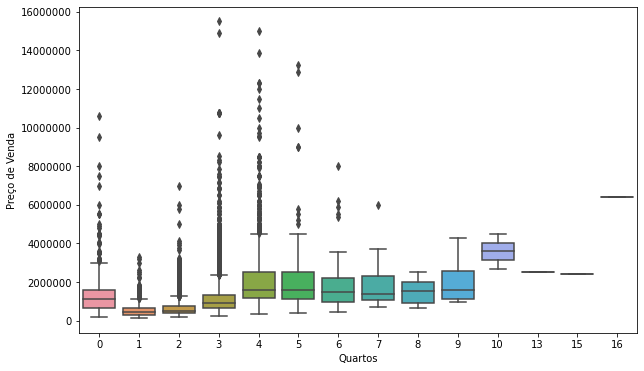

In [13]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.boxplot(x=df["Quartos"], y=df["Preço de Venda"], data=df)


Neste caso, a medida que aumenta o numero de quartos o preço aumenta.Considera-se diferentes tipos de domícilio para esta 1° abordagem

### 2.4.2-Boxplot Vagas x Preço de Venda

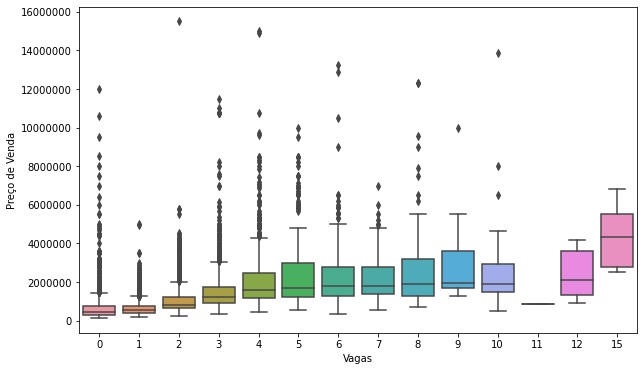

In [14]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.boxplot(x=df["Vagas"], y=df["Preço de Venda"], data=df)

Neste caso, a medida que aumenta o numero de vagas o preço aumenta menos mas tende a ficar mais linearizado os valores de preço.Considera-se diferentes tipos de domícilio para esta 2° abordagem

### 2.4.3-Boxplot Banheiros x Preço de Venda

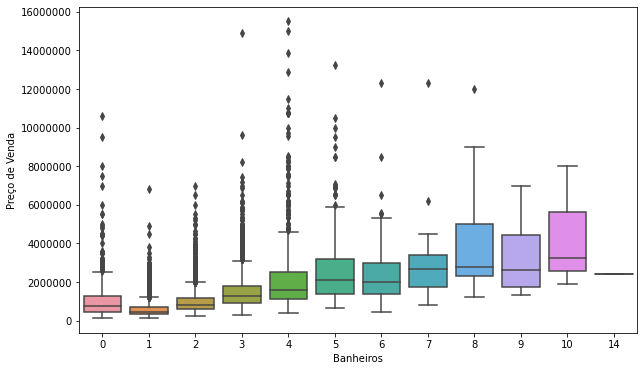

In [15]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.boxplot(x=df["Banheiros"], y=df["Preço de Venda"], data=df)

Neste caso, a medida que aumenta o numero de vagas o preço aumenta mas também tende a ficar um pouco mais linearizado os valores de preço.Considera-se diferentes tipos de domícilio para esta 3° abordagem

### 2.4.4-Boxplot Tipo de Imovel x Preço de Venda

Também fizemos uma separação em relação ao tipo de imóvel (exposto abaixo) buscando entender se há uma diferenciação de valor entre os tipos de imóveis. 

Porque haveria diferença? Um dos exemplos poderia ser entre a casa e um apartamento. Dentro de uma casa é mais facil fazer reformas, é possível aumentar o tamanho (pra cima ou até para baixo) assim podendo ser uma dessas cararcterísticas que possa aumentar o valor da casa 

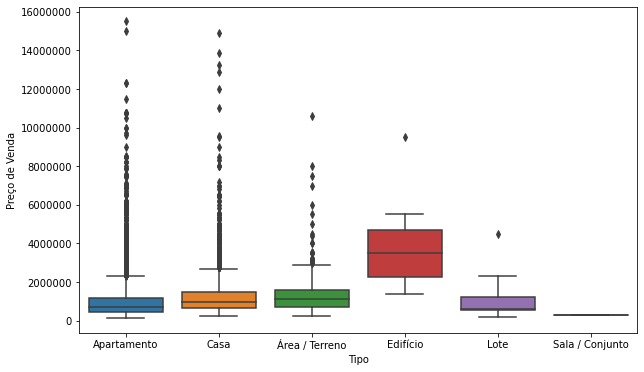

In [16]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.boxplot(x=df["Tipo"], y=df["Preço de Venda"], data=df)

## 2.5-Histogramas 

Plot de Histograma para verificar a distribuição dos dados. Observando a distribuição dos dados é possivel observar que nenhum segue uma distribuiçao normal, seguindo sempre de valores menores para maiores. Algo de se esperar, dado a lei de oferta e demanda os imoveis com maiores areas ou mais comodos tendem a ser mais caros. Portanto, ha relativamente menos oferta desse tipos de elementos 

### 2.5.1 - Histograma Area

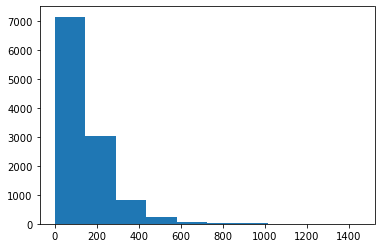

In [30]:
plt.hist(df["Área"], bins=10)
plt.show()

### 2.5.2 - Histograma Quartos

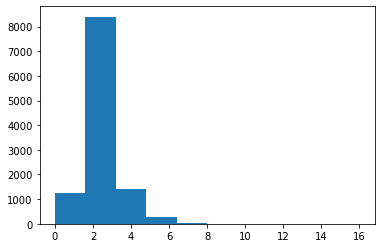

In [21]:
plt.hist(df["Quartos"], bins=10)
plt.show()

### 2.5.3 - Histograma Vagas de Garagem

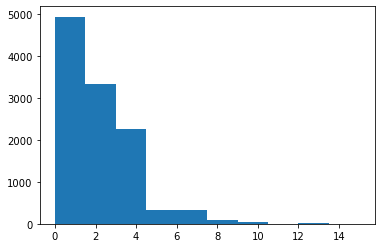

In [22]:
plt.hist(df["Vagas"], bins=10)
plt.show()

### 2.5.4 - Histograma Quantidade de Banheiros

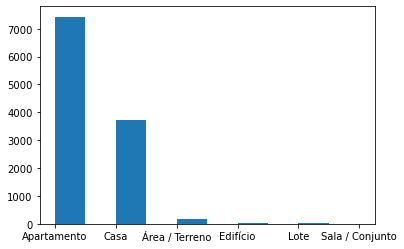

In [23]:
plt.hist(df["Banheiros"], bins=10)
plt.show()

### 2.5.5 - Histograma Tipos de Imoveis

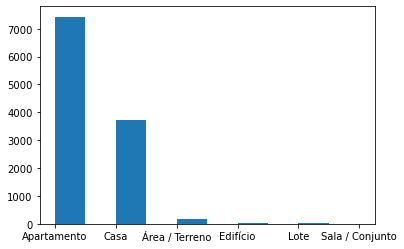

In [25]:
plt.hist(df["Tipo"], bins=10)
plt.show()

Nessa Parte são plotados os gráficos anteriores novamente, mas com alguns critérios;

In [177]:
dfq1=df.loc[df['Quartos'] == 1]
dfq2=df.loc[df['Quartos'] == 2]
dfq3=df.loc[df['Quartos'] == 3]

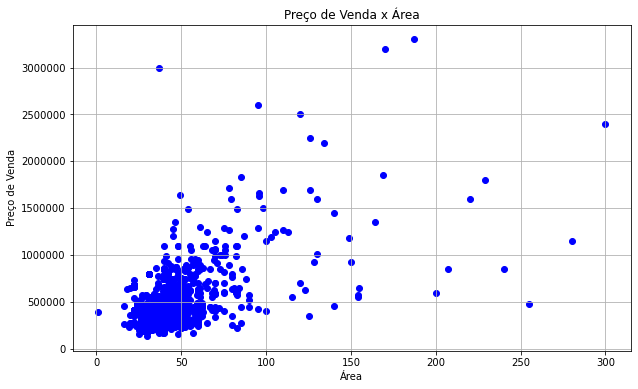

In [178]:
plt.figure(figsize=(10, 6))
plt.scatter(dfq1["Área"],dfq1["Preço de Venda"], color="b")
plt.grid()
plt.ylabel("Preço de Venda")
plt.xlabel("Área")
plt.title("Preço de Venda x Área")
plt.ticklabel_format(style='plain', axis='y')

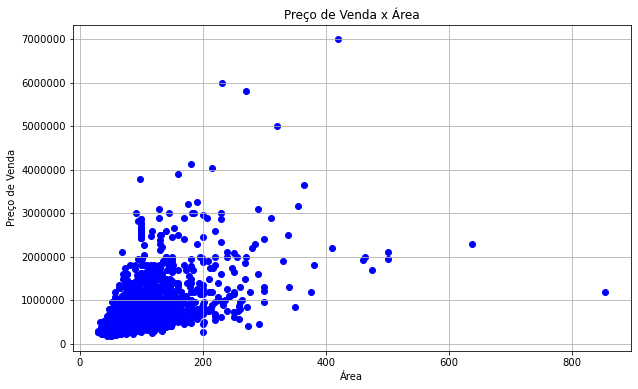

In [179]:
plt.figure(figsize=(10, 6))
plt.scatter(dfq2["Área"],dfq2["Preço de Venda"], color="b")
plt.grid()
plt.ylabel("Preço de Venda")
plt.xlabel("Área")
plt.title("Preço de Venda x Área")
plt.ticklabel_format(style='plain', axis='y')

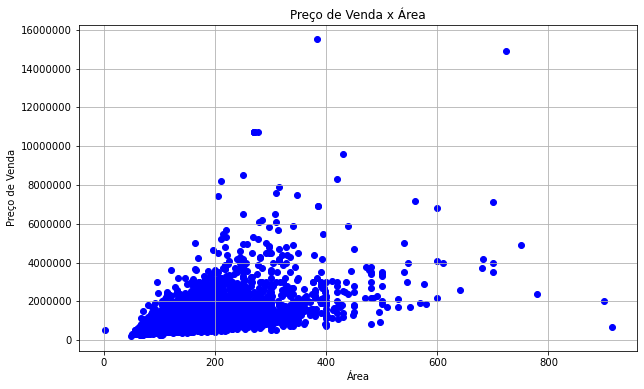

In [180]:
plt.figure(figsize=(10, 6))
plt.scatter(dfq3["Área"],dfq3["Preço de Venda"], color="b")
plt.grid()
plt.ylabel("Preço de Venda")
plt.xlabel("Área")
plt.title("Preço de Venda x Área")
plt.ticklabel_format(style='plain', axis='y')

In [182]:
df.loc[df['Quartos'] == 1]

dfq1v1= dfq1.loc[dfq1['Vagas']==1]

dfq1v1b1= dfq1v1.loc[dfq1v1['Banheiros']==1]

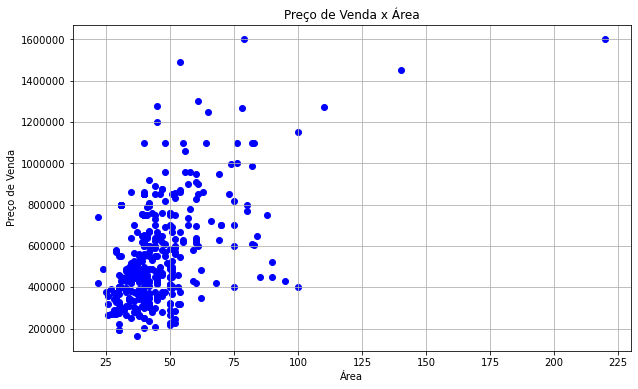

In [183]:
plt.figure(figsize=(10, 6))
plt.scatter(dfq1v1b1["Área"],dfq1v1b1["Preço de Venda"], color="b")
plt.grid()
plt.ylabel("Preço de Venda")
plt.xlabel("Área")
plt.title("Preço de Venda x Área")
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
dfq2v2= dfq2.loc[dfq2['Vagas']==2]

dfq2v2b2= dfq2v2.loc[dfq2v2['Banheiros']==2]

In [218]:
area=dfq2v2b2["Área"]
preço=dfq2v2b2["Preço de Venda"]

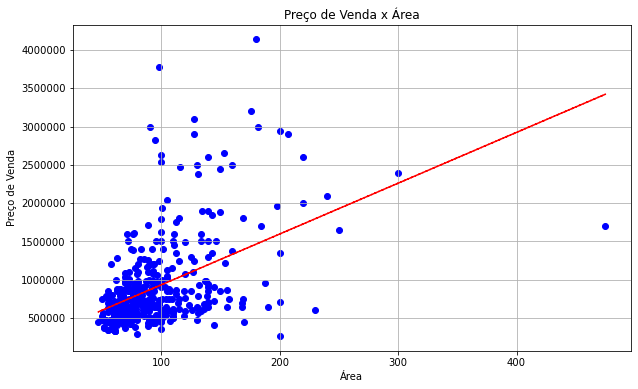

In [219]:
plt.figure(figsize=(10, 6))
plt.scatter(dfq2v2b2["Área"],dfq2v2b2["Preço de Venda"], color="b")
plt.grid()
plt.ylabel("Preço de Venda")
plt.xlabel("Área")
plt.title("Preço de Venda x Área")
plt.ticklabel_format(style='plain', axis='y')


z = np.polyfit(area, preço, 1)
p = np.poly1d(z)
plt.plot(area, p(area), "r--")

In [193]:
dfq1v1b1ta=dfq1v1b1.loc[dfq1v1b1['Tipo']=="Apartamento"]

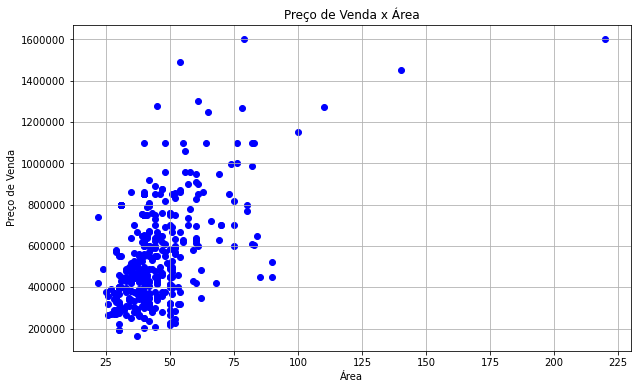

In [194]:
plt.figure(figsize=(10, 6))
plt.scatter(dfq1v1b1ta["Área"],dfq1v1b1ta["Preço de Venda"], color="b")
plt.grid()
plt.ylabel("Preço de Venda")
plt.xlabel("Área")
plt.title("Preço de Venda x Área")
plt.ticklabel_format(style='plain', axis='y')

In [196]:
dfq2v2b2ta=dfq2v2b2.loc[dfq2v2b2['Tipo']=="Apartamento"]

In [216]:
area=dfq2v2b2ta["Área"]
preço=dfq2v2b2ta["Preço de Venda"]

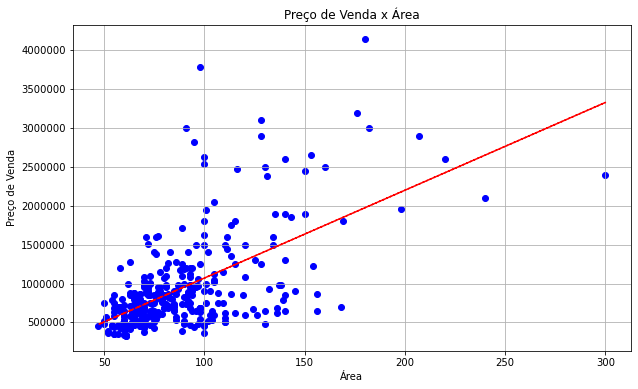

In [217]:
plt.figure(figsize=(10, 6))
plt.scatter(dfq2v2b2ta["Área"],dfq2v2b2ta["Preço de Venda"], color="b")
plt.grid()
plt.ylabel("Preço de Venda")
plt.xlabel("Área")
plt.title("Preço de Venda x Área")
plt.ticklabel_format(style='plain', axis='y')

z = np.polyfit(area, preço, 1)
p = np.poly1d(z)
plt.plot(area, p(area), "r--")

In [199]:
df

,Unnamed: 0,Tipo,Rua,Bairro,Área,Quartos,Vagas,Banheiros,Preço de Venda
0,0,Apartamento,Rua dos Capitães Mores,Mooca,87,3,2,2,620000
1,1,Apartamento,Rua Dias Leme,Mooca,79,2,1,1,560000
2,2,Apartamento,Rua do Orfanato,Vila Prudente,59,2,1,1,460000
3,3,Apartamento,Rua Álvares de Azevedo,Centro,133,3,1,2,550000
4,4,Apartamento,Rua Dianópolis,Parque da Mooca,43,2,1,1,320000
...,...,...,...,...,...,...,...,...,...
11371,11371,Casa,Rua Rubiácea,Água Fria,90,3,1,2,590000
11372,11372,Apartamento,Av. Profa. Virgília Rodrigues A. C. Pinto,Jd. Leonor M. de Barros,100,3,2,1,1042000
11373,11373,Apartamento,Rua Braga,Vila Lusitânia,91,2,2,2,735000
11374,11374,Apartamento,Rua Arroio Grande,Sacomã,67,3,2,1,555000
